# lobster_tools tutorial

In [1]:
! pip install ..

Processing /Users/nic/Documents/GitHub/lobster_tools
  Preparing metadata (setup.py) ... done
  Created wheel for lobster-tools: filename=lobster_tools-1.0-py2.py3-none-any.whl size=7161 sha256=7bc9a45323a5ea3c42d2cb6a7978c42831d0427ceb64475c46be3be19f3a0c90
  Stored in directory: /private/var/folders/fy/m11jvjg945g5cvch8thhxfq80000gn/T/pip-ephem-wheel-cache-55znbwk8/wheels/dc/ff/da/495197396be2977ccfb8795b9e14bbf36554b8e718801e8bb7
Successfully built lobster-tools
  Attempting uninstall: lobster-tools
    Found existing installation: lobster-tools 1.0
    Uninstalling lobster-tools-1.0:
      Successfully uninstalled lobster-tools-1.0

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
from lobster_tools.preprocessing import *
import pandas as pd

In [3]:
# change deafult path to data
DIRECTORY_PATH = "/Users/nic/Documents/python_code/OMI/LOBSTER_no_cookie/data"
Data.__init__.__defaults__ = (DIRECTORY_PATH, *Data.__init__.__defaults__[1:])

In [4]:
data = Data(ticker="GE", date_range="2019-01-02", levels=3)
lobster = Lobster(data)

In [6]:
lobster.book

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,bid_price_3,bid_size_3
datetime,,,,,,,,,,,,
2019-01-02 03:08:36.253659641,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>
2019-01-02 04:00:00.030994898,NaN,<NA>,7.01,400,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>
2019-01-02 04:00:00.031785491,10.99,53,7.01,400,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>
2019-01-02 04:00:00.032366928,10.99,53,7.01,400,11.97,60,NaN,<NA>,NaN,<NA>,NaN,<NA>
2019-01-02 04:00:00.033012154,10.95,60,7.01,400,10.99,53,NaN,<NA>,11.97,60,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-02 20:00:00.069447653,NaN,<NA>,7.81,20,NaN,<NA>,7.77,30,NaN,<NA>,7.0,5100
2019-01-02 20:00:00.069585967,NaN,<NA>,7.81,20,NaN,<NA>,7.00,5100,NaN,<NA>,NaN,<NA>
2019-01-02 20:00:00.069637310,NaN,<NA>,7.00,5100,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>


In [53]:
# one way to do this quickly..

class Lobsters():
    def __init__(self, lobster_list, sorted=False):
        self.tickers = [lobster.data.ticker for lobster in lobster_list]
        self.date_range = [lobster.data.date_range for lobster in lobster_list]
        
        if 'ticker' not in lobster_list[0].messages:
            [lobster.add_ticker_column() for lobster in lobster_list]
        self.book = pd.concat([lobster.book for lobster in lobster_list])
        self.messages =  pd.concat([lobster.messages for lobster in lobster_list])

        if sorted:
            self.book.sort_index()
            self.messages.sort_index()

In [32]:
DATE_RANGE = ("2019-01-02","2019-01-03")
tickers = ["GE","AIG"]
data_list = [Data(ticker=ticker, date_range=DATE_RANGE) for ticker in tickers]
lobster_list = [Lobster(data=data) for data in data_list]

In [55]:
a = Lobsters(lobster_list=lobster_list, sorted=True)

AttributeError: 'Lobsters' object has no attribute 'sample'

In [60]:
lobster.book.eval('mid = (ask_price_1 + bid_price_1 ) / 2', inplace=True)
lobster.book.eval('spread = ask_price_1 - bid_price_1', inplace=True)
lobster.book

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,bid_price_3,bid_size_3,mid,spread
datetime,,,,,,,,,,,,,,
2019-01-02 03:08:36.253659641,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN
2019-01-02 04:00:00.030994898,NaN,<NA>,7.01,400,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN
2019-01-02 04:00:00.031785491,10.99,53,7.01,400,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,9.00,3.98
2019-01-02 04:00:00.032366928,10.99,53,7.01,400,11.97,60,NaN,<NA>,NaN,<NA>,NaN,<NA>,9.00,3.98
2019-01-02 04:00:00.033012154,10.95,60,7.01,400,10.99,53,NaN,<NA>,11.97,60,NaN,<NA>,8.98,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-02 20:00:00.069447653,NaN,<NA>,7.81,20,NaN,<NA>,7.77,30,NaN,<NA>,7.0,5100,NaN,NaN
2019-01-02 20:00:00.069585967,NaN,<NA>,7.81,20,NaN,<NA>,7.00,5100,NaN,<NA>,NaN,<NA>,NaN,NaN
2019-01-02 20:00:00.069637310,NaN,<NA>,7.00,5100,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN


<AxesSubplot: xlabel='datetime'>

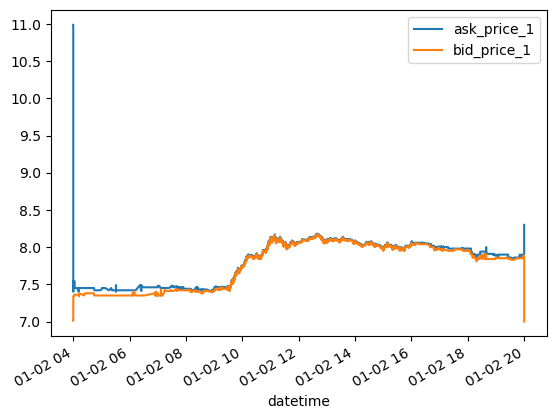

In [61]:
(lobster
 .book
 .first_n_levels(1)
 .plot(y=['ask_price_1', 'bid_price_1'])
 )


<AxesSubplot: xlabel='datetime'>

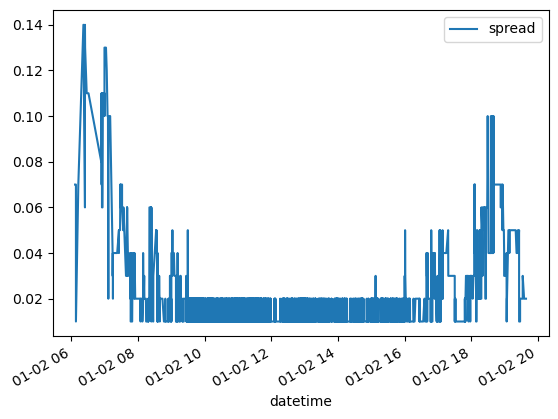

In [66]:
clip = 100
(lobster
 .book
 .iloc[clip:-clip]
 .plot(y=['spread'])
 )


In [63]:
# TODO groupby EventGroups
lobster.messages.groupby(by="event").agg({'size':'mean', 'price':'count'})

,size,price
event,,
Event.UNKNOWN,<NA>,0
Event.SUBMISSION,1645.718366,202646
Event.CANCELLATION,1062.434257,3392
Event.DELETION,1699.302255,186402
Event.EXECUTION,705.223348,18263
Event.HIDDEN_EXECUTION,395.007775,4630
Event.CROSS_TRADE,0.0,2
Event.TRADING_HALT,<NA>,0
Event.OTHER,<NA>,0
